# Notebook just for making some publication/presentation ready plots

In [1]:
# Imports
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import netCDF4 as nc
import math
import datetime
import xarray as xr
import matplotlib.dates as mdates
import dask.array as da
from erddapy import ERDDAP
from netCDF4 import Dataset
import gsw
import cmocean.cm as cmo
import sys

## To import functions from Slocum-AD2CP GitHub repository, make this path the path to where the repo exists locally
#sys.path.insert(0,'/home/jg1200/GitHub/Slocum-AD2CP/src/analysis/')
sys.path.insert(0,'../src/analysis/')
from analysis import gsw_rho, profile_mld, get_erddap_dataset, grid_glider_data, dist_from_lat_lon

## Set some plotting formats
plt.style.use('seaborn-poster')
myFmtshort = mdates.DateFormatter('%m/%d\n%H:%M')
myFmtlong = mdates.DateFormatter('%m/%d/%y \n%H:%M')
myFmt = mdates.DateFormatter('%m/%d/%y')

## Plot transport time-series from RU29 2020 and RU36 2022 together

In [2]:
df29 = pd.read_csv('/home/jg1200/Data/GliderData/RU29/transport.csv')
df36 = pd.read_csv('/home/jg1200/Data/GliderData/RU36/transport.csv')
df36

,Unnamed: 0,transport_u,transport_v
0,0,-1.941463,-0.254457
1,1,-2.084861,0.263643
2,2,-1.623094,0.414784
3,3,-2.694441,0.604203
4,4,-2.367335,0.004448
5,5,-4.097117,0.276387


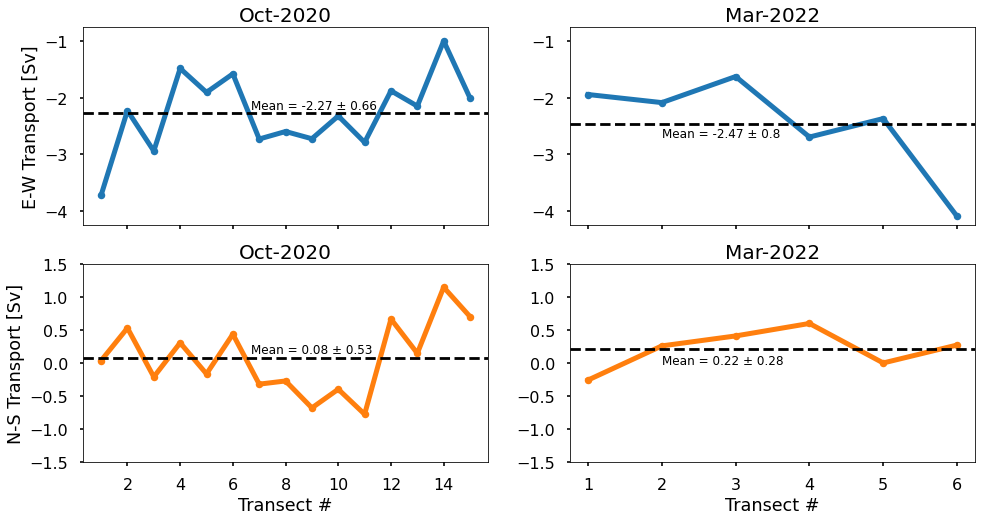

In [3]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(16,8))

axlist = [ax1,ax2,ax3,ax4]



ax1.plot(np.arange(1,16),df29.transport_u, linewidth=5,color='tab:blue')
ax1.plot(np.arange(1,16),df29.transport_u, '.',color='tab:blue',markersize=15)
ax1.set_ylabel('E-W Transport [Sv]')
ax1.set_ylim(-4.25,-0.75)
ax1.axhline(y=np.nanmean(df29.transport_u), color='k', linestyle='--')
ax1.text(6.7, np.nanmean(df29.transport_u)+0.075, "Mean = %s \u00B1 %s" %(np.round(np.nanmean(df29.transport_u),2),np.round(np.nanstd(df29.transport_u),2)), size=12);
ax1.set_title('Oct-2020',fontsize=20)
ax1.xaxis.set_ticklabels([])


ax2.plot(np.arange(1,7),df36.transport_u, linewidth=5,color='tab:blue')
ax2.plot(np.arange(1,7),df36.transport_u, '.',color='tab:blue',markersize=15)
ax2.axhline(y=np.nanmean(df36.transport_u), color='k', linestyle='--')
ax2.set_ylim(-4.25,-0.75)
ax2.text(2, np.nanmean(df36.transport_u)-0.225, "Mean = %s \u00B1 %s" %(np.round(np.nanmean(df36.transport_u),2),np.round(np.nanstd(df36.transport_u),2)), size=12);
ax2.set_title('Mar-2022',fontsize=20)
ax2.xaxis.set_ticklabels([])


ax3.plot(np.arange(1,16),df29.transport_v, linewidth=5,color='tab:orange')
ax3.plot(np.arange(1,16),df29.transport_v, '.',color='tab:orange',markersize=15)
ax3.set_ylabel('N-S Transport [Sv]')
ax3.set_xlabel('Transect #')
ax3.axhline(y=np.nanmean(df29.transport_v), color='k', linestyle='--')
ax3.set_ylim(-1.5,1.5)
ax3.text(6.7, np.nanmean(df29.transport_v)+0.075, "Mean = %s \u00B1 %s" %(np.round(np.nanmean(df29.transport_v),2),np.round(np.nanstd(df29.transport_v),2)), size=12);
ax3.set_title('Oct-2020',fontsize=20)


ax4.plot(np.arange(1,7),df36.transport_v, linewidth=5,color='tab:orange')
ax4.plot(np.arange(1,7),df36.transport_v, '.',color='tab:orange',markersize=15)
ax4.set_xlabel('Transect #')
ax4.axhline(y=np.nanmean(df36.transport_v), color='k', linestyle='--')
ax4.set_ylim(-1.5,1.5)
ax4.text(2, np.nanmean(df36.transport_v)-0.225, "Mean = %s \u00B1 %s" %(np.round(np.nanmean(df36.transport_v),2),np.round(np.nanstd(df36.transport_v),2)), size=12);
ax4.set_title('Mar-2022',fontsize=20)

plt.savefig('/home/jg1200/Figures/RU29_2020_RU36_2022_EW_NS_Transport.png',dpi=300,facecolor='white',bbox_inches='tight')



## Plot transport depth profile from RU29 2020 and RU36 2022 together

In [4]:
df29 = pd.read_csv('/home/jg1200/Data/GliderData/RU29/transport_depth_profile.csv')
df36 = pd.read_csv('/home/jg1200/Data/GliderData/RU36/transport_depth_profile.csv')

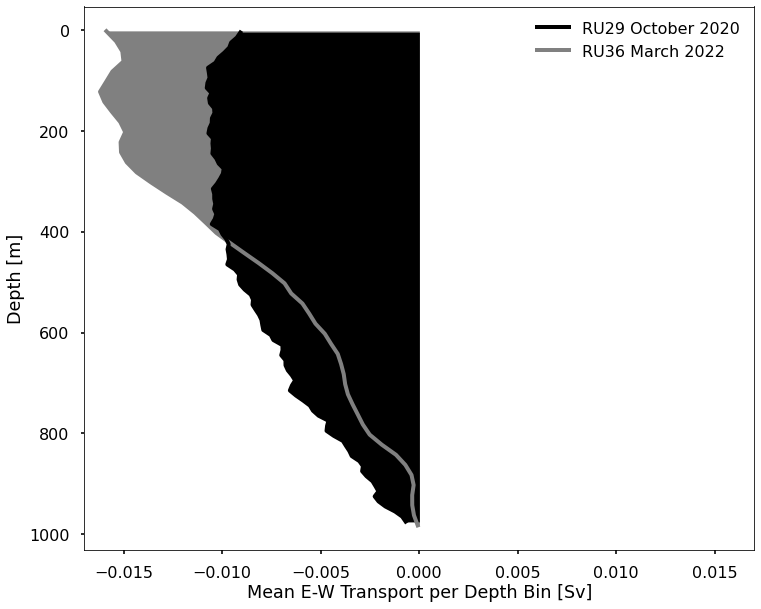

In [5]:
plt.figure(figsize=(12,10))

plt.plot(df36.transport_u,df36.depth,color='grey',linewidth=4,label='RU36 March 2022')
plt.fill_betweenx(df36.depth, 0,df36.transport_u,color='grey')


plt.plot(df29.transport_u*2,df29.depth,color='black',linewidth=4,label='RU29 October 2020')
plt.fill_betweenx(df29.depth, 0,df29.transport_u*2,color='black')


plt.xlim(-0.017,0.017)
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]')
plt.xlabel('Mean E-W Transport per Depth Bin [Sv]')



###### To change the order of elements plotted in legend so it is chronological
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [1,0]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False) 

plt.savefig('/home/jg1200/Figures/RU29_2020_RU36_2022_Transport_Depth_Profile.png',dpi=300,facecolor='white',bbox_inches='tight')


In [9]:

np.nansum(df36.transport_u.values)

-0.41134195160444